# Deep Learning Fundamentals - LU05B Exercise

## 5.0 Getting familiar with Keras
You have been previously introduced to Keras library in the first lab exercise. Now it is a good time to get familiar with some advance functions of this library. First, let's load the MNIST dataset

In [1]:
from keras.datasets import mnist

# Load the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the data
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

# Print out the dimension of the data
print('X_train shape: {}'.format(train_images.shape))
print('y_train shape: {}'.format(train_labels.shape))
print('X_test shape: {}'.format(test_images.shape))
print('y_test shape: {}'.format(test_labels.shape))

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


## 5.1 Building models
### 5.1.1 Method 1 - Sequential object

In [2]:
import keras
from keras import Sequential
from keras.layers import Flatten, Dense

# Define the layers
model_1 = keras.Sequential(name='MNIST_classifier_model_1')
model_1.add(Flatten(input_shape=(28, 28), name='flatten_layer'))
model_1.add(Dense(128, activation='relu', name='fc_layer'))
model_1.add(Dense(10, activation='softmax', name='output_layer'))

# Print the summary of the model
print(model_1.summary())

Model: "MNIST_classifier_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_layer (Flatten)     (None, 784)               0         
                                                                 
 fc_layer (Dense)            (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


### 5.1.2 Method 2 - Using Model object (Functional)

In [3]:
import keras
from keras import Input, Model
from keras.layers import Flatten, Dense

# Define the layers
input_layer = Input(shape=(28, 28), name='input_layer')
flattened_layer = Flatten(name='flatten_layer')(input_layer)
fc_layer = Dense(128, activation='relu', name='fc_layer')(flattened_layer)
output_layer = Dense(10, activation='softmax', name='output_layer')(fc_layer)

# Wrap the inputs and outputs using Model object
model_2 = Model(inputs=input_layer, outputs=output_layer, name='MNIST_classifier_model_2')

# Print the summary of the model
print(model_2.summary())

Model: "MNIST_classifier_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 28, 28)]          0         
                                                                 
 flatten_layer (Flatten)     (None, 784)               0         
                                                                 
 fc_layer (Dense)            (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


### 5.1.3 Method 3 - Inherit Model object 

In [4]:
class MNISTClassifier(keras.Model):
    def __init__(self):
        super(MNISTClassifier, self).__init__(name='MNIST_classifier_model_3')
        self.flattened_layer = Flatten(name='flatten_layer')
        self.fc_layer = Dense(128, activation='relu', name='fc_layer')
        self.output_layer = Dense(10, activation='softmax', name='output_layer')
        
    def call(self, inputs):
        x = self.flattened_layer(inputs)
        x = self.fc_layer(x)
        return self.output_layer(x)
    
model_3 = MNISTClassifier()
model_3.build(input_shape=(None, 28, 28, 1))

# Print the summary of the model
print(model_3.summary())

Model: "MNIST_classifier_model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_layer (Flatten)     multiple                  0         
                                                                 
 fc_layer (Dense)            multiple                  100480    
                                                                 
 output_layer (Dense)        multiple                  1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


## 5.2  Compile and train the model

In previous exercise, we convert the labels to one-hot vector. However, we can train the model without converting the labels to one-hot vector.

In [5]:
import keras.utils.np_utils as ku

# Convert the labels to one-hot vector
train_labels_cat = ku.to_categorical(train_labels)

# Compile and train the model 1
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_1 = model_1.fit(train_images, train_labels_cat, epochs=10, validation_split=0.2, batch_size=128)

Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 0.3971 - accuracy: 0.8907 - val_loss: 0.2156 - val_accuracy: 0.9419
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1862 - accuracy: 0.9471 - val_loss: 0.1542 - val_accuracy: 0.9589
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1337 - accuracy: 0.9621 - val_loss: 0.1357 - val_accuracy: 0.9612
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1030 - accuracy: 0.9707 - val_loss: 0.1135 - val_accuracy: 0.9670
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0832 - accuracy: 0.9768 - val_loss: 0.1044 - val_accuracy: 0.9690
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0686 - accuracy: 0.9807 - val_loss: 0.0953 - val_accuracy: 0.9731
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0581 - accuracy: 0.9839 - val_loss: 0.0934 - val_accuracy: 0.9718
Epoch 

In [6]:
# Compile and train the model 2
# Use the train_labels (without converting to one-hot vector)
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_2 = model_2.fit(train_images, train_labels, epochs=10, validation_split=0.2, batch_size=128)

Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 0.3977 - accuracy: 0.8914 - val_loss: 0.2051 - val_accuracy: 0.9452
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1798 - accuracy: 0.9490 - val_loss: 0.1491 - val_accuracy: 0.9595
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1308 - accuracy: 0.9619 - val_loss: 0.1301 - val_accuracy: 0.9632
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1020 - accuracy: 0.9706 - val_loss: 0.1129 - val_accuracy: 0.9663
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0825 - accuracy: 0.9767 - val_loss: 0.1001 - val_accuracy: 0.9701
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0680 - accuracy: 0.9808 - val_loss: 0.0941 - val_accuracy: 0.9716
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0568 - accuracy: 0.9841 - val_loss: 0.0901 - val_accuracy: 0.9719
Epoch 

### 5.2 Custom loss function and metric

You can implement your own custom loss function by creating a function and passing into the loss during model.compile. Similarly, you can implement your own metric as well. Try implementing your own metric.

-https://www.tensorflow.org/api_docs/python/tf/keras/losses/Loss

-https://towardsdatascience.com/three-ways-to-use-custom-validation-metrics-in-tf-keras-tf2-bb9c40a3076

-https://towardsdatascience.com/custom-loss-function-in-tensorflow-2-0-d8fa35405e4e


In [7]:
import keras.backend as kb

def custom_loss(y_actual, y_pred):
    custom_loss = kb.mean(kb.square(y_actual - y_pred))
    return custom_loss

# Compile and train the model 3
model_3.compile(optimizer='adam', loss=custom_loss, metrics=['accuracy'])
history_3 = model_3.fit(train_images, train_labels_cat, epochs=10, validation_split=0.2, batch_size=128)

Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0175 - accuracy: 0.8897 - val_loss: 0.0090 - val_accuracy: 0.9439
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0085 - accuracy: 0.9471 - val_loss: 0.0075 - val_accuracy: 0.9528
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0065 - accuracy: 0.9599 - val_loss: 0.0060 - val_accuracy: 0.9628
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0051 - accuracy: 0.9695 - val_loss: 0.0052 - val_accuracy: 0.9669
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0042 - accuracy: 0.9750 - val_loss: 0.0049 - val_accuracy: 0.9689
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0036 - accuracy: 0.9791 - val_loss: 0.0046 - val_accuracy: 0.9706
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0031 - accuracy: 0.9820 - val_loss: 0.0043 - val_accuracy: 0.9722
Epoch 

## 5.3 Process and feed the data

#### CIFAR-10
---
The Canadian Institute for Advanced Research (CIFAR)  provides the CIFAR-10 and CIFAR-100 datasets with 10 and 100 classifications respectively.
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 

The label data is just a list of 10,000 numbers ranging from 0 to 9, which corresponds to each of the 10 classes in CIFAR-10.

airplane : 0  
automobile : 1  
bird : 2  
cat : 3  
deer : 4  
dog : 5  
frog : 6  
horse : 7  
ship : 8  
truck : 9 

Let's load the CIFAR data first

In [8]:
from keras.datasets import cifar10

# Load the CIFAR data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Print out the dimension of the data
print('X_train shape: {}'.format(x_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(x_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


Display the images

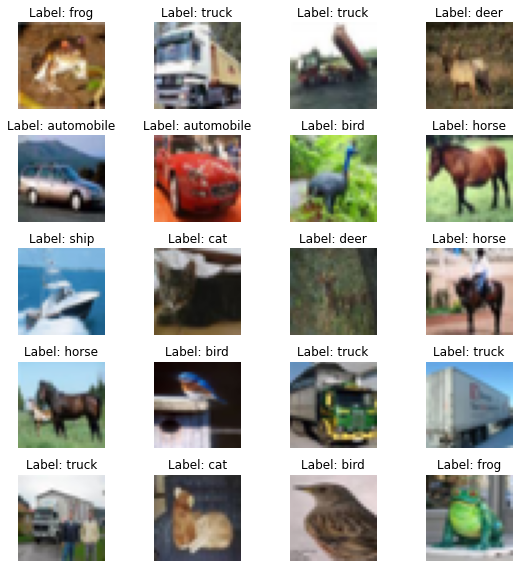

In [9]:
import matplotlib.pyplot as plt

# To create a mapping of the label class to allow display of the description instead of a number
categories = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(8, 8))
for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.imshow(x_train[i], cmap='bone')
    plt.axis('off')
    plt.title('Label: {}'.format(categories[y_train[i][0]]))

plt.tight_layout()
plt.show()

### 5.3.1 Data augmentation using ImageDataGenerator (Geometric transformation)
-https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

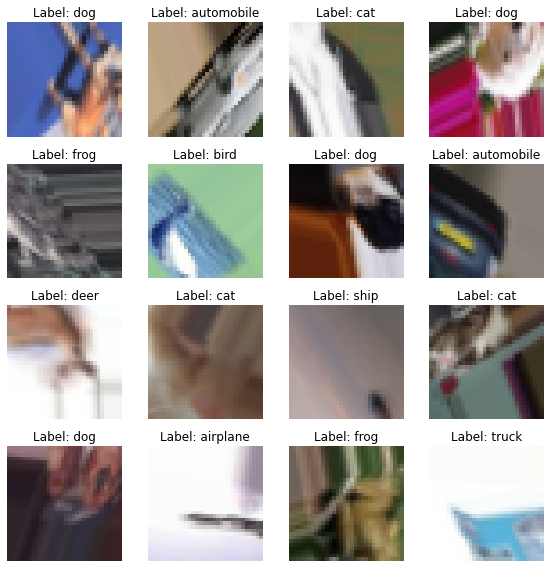

In [10]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# Initialize the ImageDataGenerator for geometric transformation
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=45,
                             width_shift_range=[-8, 8],
                             height_shift_range=[-8, 8],
                             shear_range=45,
                             zoom_range=[0.75, 1.25],
                             horizontal_flip=True,
                             vertical_flip=True,
                             validation_split=0.2)

# Convert the labels to one-hot vector
y_train_cat = ku.to_categorical(y_train)

for batch_x, batch_y in datagen.flow(x_train, y_train_cat, batch_size=16):
    plt.figure(figsize=(8, 8))
    for i in range(16):
        x = batch_x[i]
        y = batch_y[i]
        index = np.argmax(y)
        plt.subplot(4, 4, i+1)
        plt.imshow(x)
        plt.axis('off')
        plt.title('Label: {}'.format(categories[index]))
    plt.tight_layout()
    plt.show()
    break

### 5.3.2 Data augmentation using ImageDataGenerator (Colour space transformation)

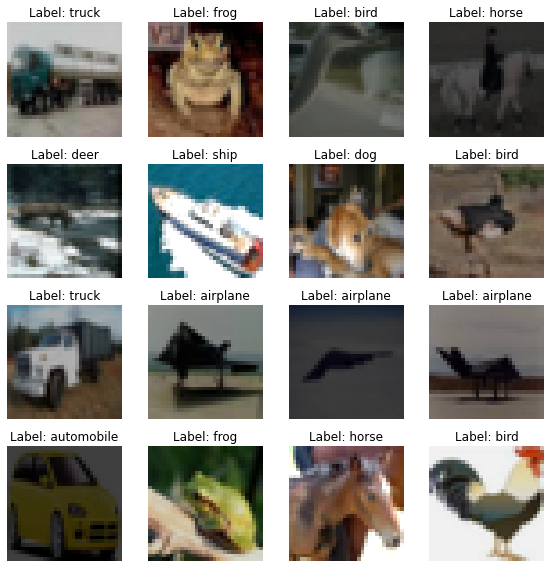

In [11]:
# Initialize the ImageDataGenerator for colour space transformation
datagen = ImageDataGenerator(rescale=1./255,
                             channel_shift_range=0.25,
                             brightness_range=[0.2, 1.2])

for batch_x, batch_y in datagen.flow(x_train, y_train_cat, batch_size=16):
    plt.figure(figsize=(8, 8))
    for i in range(16):
        x = batch_x[i]
        y = batch_y[i]
        index = np.argmax(y)
        plt.subplot(4, 4, i+1)
        plt.imshow(x)
        plt.axis('off')
        plt.title('Label: {}'.format(categories[index]))
    plt.tight_layout()
    plt.show()
    break

### 5.3.3 Data generator

For most real life dataset, it is not possible to load all the images into the local machine due to limitation in memory. Hence, there is a need to use some keras utility function to read the data from the directory.

-https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory

Found 40 files belonging to 4 classes.


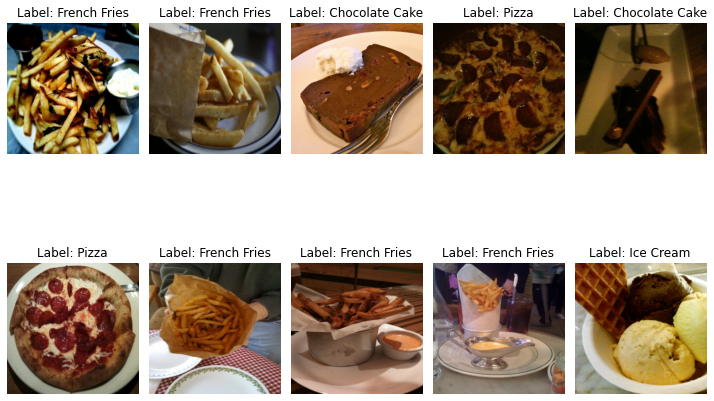

In [12]:
from tensorflow.keras.utils import image_dataset_from_directory

datagen = image_dataset_from_directory(directory='sample_dataset', batch_size=32)

# To create a mapping of the label class to allow display of the description instead of a number
categories = ['Chocolate Cake','French Fries','Ice Cream','Pizza']

for batch_x, batch_y in datagen:
    plt.figure(figsize=(10, 8))
    for i in range(10):
        x = batch_x[i] / 255
        y = batch_y[i]
        plt.subplot(2, 5, i+1)
        plt.imshow(x)
        plt.axis('off')
        plt.title('Label: {}'.format(categories[y]))
    plt.tight_layout()
    plt.show()
    break

Most of tensorflow and keras library support the processing of 2D images. In rare cases in which your data consists of more than 2D, you may have to write custom data generator.

-https://towardsdatascience.com/implementing-custom-data-generators-in-keras-de56f013581c

In [13]:
import os
import math
import cv2
from glob import glob
import tensorflow as tf
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle


class CustomDataGenerator(Sequence):
    def __init__(self, data_dir, batch_size=32, shuffle_data=True):
        self.data_dir = data_dir
        self.batch_size = batch_size
        self.shuffle_data = shuffle_data
        self.x, self.y = self._obtain_data()
        if self.shuffle_data:
            self.x, self.y = shuffle(self.x, self.y)
            
    def __len__(self):
        return math.ceil(len(self.x) / self.batch_size)
    
    def on_epoch_end(self):
        if self.shuffle_data:
            self.x, self.y = shuffle(self.x, self.y)
        else:
            return self.x, self.y
    
    def _obtain_data(self):
        # Obtain the full data using glob
        x_list = glob(os.path.join(self.data_dir, '*', '*'))
        
        # Obtain the labels
        label_name_list = [i.split('\\')[1] for i in x_list]       
        y_list = []
        for i in label_name_list:
            if i == 'chocolate_cake':
                y_list.append(0)
            elif i == 'french_fries':
                y_list.append(1)
            elif i == 'ice_cream':
                y_list.append(2)
            elif i == 'pizza':
                y_list.append(3)
        return x_list, y_list
    
    def __getitem__(self, idx):
        # Obtain one batch
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]

        # Process one batch
        x_list, y_list = [], []
        for i, (x, y) in enumerate(zip(batch_x, batch_y)):
            x_img = cv2.imread(x, 1)
            x_img = x_img[..., [2, 1, 0]]
            x_img = x_img / 255

            # Resize, normalize the data and append to list
            x_resized = cv2.resize(x_img, dsize=(128, 128))
            x_list.append(x_resized)
            y_list.append(y)

        # Convert to numpy array and perform one-hot encoding
        X = np.stack(x_list, axis=0)
        Y = np.stack(y_list, axis=0)
        X = tf.cast(X, dtype=tf.float32)
        Y = tf.one_hot(Y, depth=4, on_value=1, off_value=0)
        Y = tf.cast(Y, dtype=tf.float32)
        return X, Y

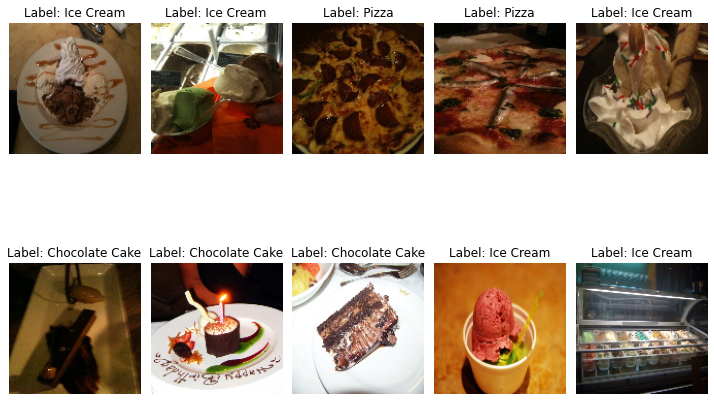

In [14]:
datagen = CustomDataGenerator(data_dir='sample_dataset', batch_size=10, shuffle_data=True)

for batch_x, batch_y in datagen:
    plt.figure(figsize=(10, 8))
    for i in range(10):
        x = batch_x[i]
        y = batch_y[i]
        index = np.argmax(y)
        plt.subplot(2, 5, i+1)
        plt.imshow(x)
        plt.axis('off')
        plt.title('Label: {}'.format(categories[index]))
    plt.tight_layout()
    plt.show()
    break